In [16]:
D1 = "This computer science course is awesome science".lower()
D2 = "Welcome lab to computer science computer lab".lower()
D3 = "Lab welcome to this lab this is awesome lab space".lower()
D4 = "Just testing this out so we can move on".lower()

In [19]:
terms = []
corpus = [D1,D2,D3, D4]
for doc in corpus:
    terms = terms + doc.split()
terms = list(set(terms))
print terms
print corpus

['move', 'on', 'we', 'testing', 'just', 'to', 'this', 'science', 'is', 'welcome', 'space', 'lab', 'course', 'computer', 'so', 'can', 'awesome', 'out']
['this computer science course is awesome science', 'welcome lab to computer science computer lab', 'lab welcome to this lab this is awesome lab space', 'just testing this out so we can move on']


In [22]:
# TF list
TF = []

#existance of term across documents : Document Frequency of all Term 
n = [0 for i in range(len(terms))]


for doc in corpus:
    
    tf_doc = [0 for i in range(len(terms))]
    
    #determining term frequency
    for term in doc.split():
        term_i = terms.index(term)
        tf_doc[term_i] = tf_doc[term_i] + 1
    
    # computing the document term frequency
    for item in range(len(terms)):
        if tf_doc[item] > 0:
            n[item] = n[item] + 1

    TF.append(tf_doc)
TF

[[0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 3, 0, 0, 0, 0, 1, 0],
 [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]]

In [24]:
TFN = []
#for each document (TFj) in the Term Freq Matrix
for TFj in TF:
    #for each term TFij
    TFj = [TFij / float(max(TFj)) for TFij in TFj]
    TFN.append(TFj)

In [7]:
TFN

[[0.0, 0.5, 1.0, 0.5, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5],
 [0.5, 0.0, 0.5, 0.0, 0.5, 0.0, 1.0, 0.0, 1.0, 0.0],
 [0.3333333333333333,
  0.6666666666666666,
  0.0,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  1.0,
  0.0,
  0.0,
  0.3333333333333333]]

## InverseDocumentFrequency

In [25]:
import math
N = len(corpus)

In [26]:
IDF = []
for termi in range(len(terms)):
    IDF.append(math.log(3/float(n[termi]),2))

In [27]:
IDF

[1.5849625007211563,
 1.5849625007211563,
 1.5849625007211563,
 1.5849625007211563,
 1.5849625007211563,
 0.5849625007211562,
 0.0,
 0.5849625007211562,
 0.5849625007211562,
 0.5849625007211562,
 1.5849625007211563,
 0.5849625007211562,
 1.5849625007211563,
 0.5849625007211562,
 1.5849625007211563,
 1.5849625007211563,
 0.5849625007211562,
 1.5849625007211563]

In [28]:
TFNIDF = []
for TFNj in TFN:
    TFNjIDF = []
    for termIDX in range(len(terms)):
        TFNjIDF.append(TFNj[termIDX]*IDF[termIDX])
    TFNIDF.append(TFNjIDF)
        

In [29]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [30]:
TFIDX = pd.DataFrame(TFNIDF)
TFIDX.columns = terms
TFIDX

,move,on,we,testing,just,to,this,science,is,welcome,space,lab,course,computer,so,can,awesome,out
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.584963,0.292481,0.000000,0.000000,0.000000,0.792481,0.292481,0.000000,0.000000,0.292481,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.292481,0.0,0.292481,0.000000,0.292481,0.000000,0.584963,0.000000,0.584963,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.194988,0.0,0.000000,0.194988,0.194988,0.528321,0.584963,0.000000,0.000000,0.000000,0.000000,0.194988,0.000000
3,1.584963,1.584963,1.584963,1.584963,1.584963,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.584963,1.584963,0.000000,1.584963


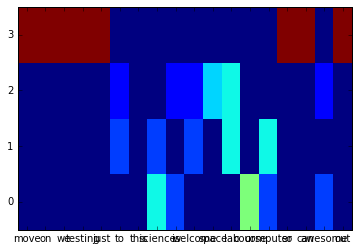

In [31]:
plt.pcolor(TFIDX)
plt.yticks(np.arange(0.5, len(TFIDX.index), 1), TFIDX.index)
plt.xticks(np.arange(0.5, len(TFIDX.columns), 1), TFIDX.columns)
plt.show()

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [33]:
Z = linkage(TFIDX, 'ward')


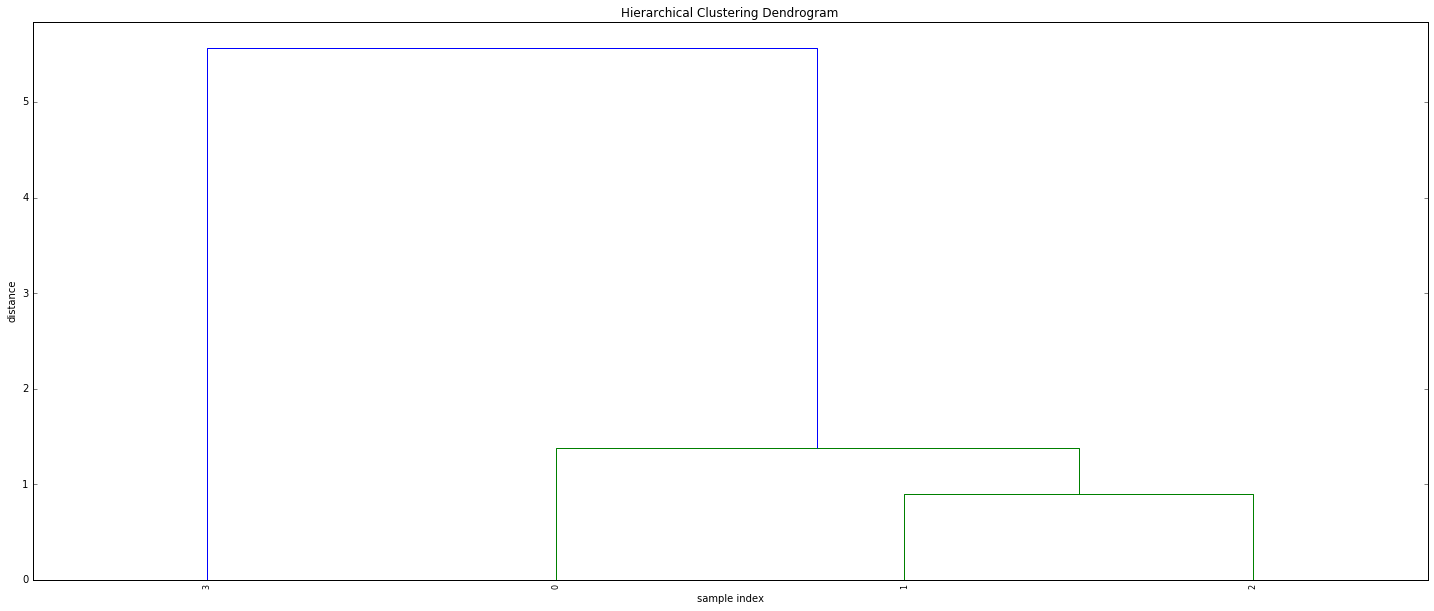

In [34]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

## Hashes 101

In [35]:
hashtable = [0] * 10

In [36]:
hashtable

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [37]:
def hash_function(x): return x % 10 

In [38]:
# Insert a value at a specific key location

def Hinsert(htable,key,value): htable[hash_function(key)] = value


In [39]:
Hinsert(hashtable,41,'apple')
Hinsert(hashtable,93,'banana')

hashtable

[0, 'apple', 0, 'banana', 0, 0, 0, 0, 0, 0]

In [42]:
Hinsert(hashtable, 23, 'tangerine')
hash_function(23)

3

In [41]:
hashtable

[0, 'apple', 0, 'tangerine', 0, 0, 0, 0, 0, 0]

Classically we would say well if you get collisions, we should improve the data structure.

But our objective here is not to prevent collisions, our objective is to create a well balanced hash function.

**Try implementing the example on page 9 in the book.**

You can use the following updated hash functions as a starting point, note the bucket size is fixed. You should probably change that.

In [43]:

def yourname_hash_function(x): return x % 11 


my_lHtable = [[] for x in range(11)]

def lHinsert(htable,key,value): htable[yourname_hash_function(key)].append((key,value))


In [44]:
lHinsert(my_lHtable,41,'apple')
lHinsert(my_lHtable,93,'banana')
lHinsert(my_lHtable,23,'tangerine')

In [45]:
my_lHtable

[[],
 [(23, 'tangerine')],
 [],
 [],
 [],
 [(93, 'banana')],
 [],
 [],
 [(41, 'apple')],
 [],
 []]

### Hashes and Indexes?

Imagine that instead of providing a key and a value, you used the value to generate the key.
When you use a value to generate a key, that's called an index
This then allows quick retrival of information from the hash.

Create a function that converts the value given as a string (fruit names in the prior example) to a numerical key value (which will then be hashed using your previous function)

*Hint - Try searching google for string to value conversion in python... but you are free to use any mechanism you wish*

In [ ]:
def yourname_string_to_int(myString): 
    myKey = ???
    return myKey

yourname_string_to_int("foo")

Your inserts would now look like this, though you (sh)/(c)ould create a new insert function...

In [ ]:
myNewHashtable = [[] for x in range(??)]

lHinsert(myNewHashtable, yourname_string_to_int('apple'),'apple')
lHinsert(myNewHashtable, yourname_string_to_int('banana'),'banana')
lHinsert(myNewHashtable, yourname_string_to_int('tangerine'),'tangerine')


In [ ]:
myNewHashtable

## Computing $e$ (brute forcing)

$e = $ limit as $(1+\frac{1}{x})^x $ as $x$ tends towards infinite

In [51]:
previousE = 0.0
for x in range(1,100000):
    newE = pow(1 + (1/float(x)),x)
    if (newE - previousE)/newE < 0.000000000001:
        print "x @ ", x
        break
    previousE = newE
print "e appox =", previousE

e appox = 2.71826823703


Consider $(1+a)^b$ where a is relatively small

$(1+a)^b = (1+a)^{(b*a)}*(1/a)$

Let $a = 1/x$ ; clearly $1/a = x$

Substitute

$(1 + \frac{1}{x})^{x(ba)}$

Exponent Rules!

$((1 + \frac{1}{x})^{x})^{(ba)}$

But we already know that $(1 + \frac{1}{x})^{x})$ is approx by $e$, so

$((1 + \frac{1}{x})^{x})^{(ba)} \approx e^{ba} \approx (1+a)^b$



What this allows is to solve problems liks $(1+a)^b)$ as $e^{ab}$

Really what's important is that $(1 - a)^b \approx e^{-ab}$ when a is small and b is large!

### Taylor Expansion of $e^x$ , approx hold for small values of x
$e^x = \sum_{i=0}^\infty \frac{x^i}{i!}$

$e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!}\cdots =  1 + x + \frac{x^2}{2} + \frac{x^3}{6} + \frac{x^4}{24} \cdots$

In [50]:
import math
x = 1
approx = 0
for i in range(0,10):
    approx = approx + math.pow(x,i)/math.factorial(i)
print approx, "~", math.exp(x)


2.71828152557 ~ 2.71828182846
